
#import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read the dataset

In [2]:
d=pd.read_csv("D:\ML\MLpractice\kidney_disease.csv")

In [3]:
s=d.copy()
s.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
s[['classification']] = s[['classification']].replace(to_replace={'ckd':1,'notckd':0,'ckd\t':0})
s

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,0


In [5]:
new_names={"bp":"blood_pressure",
"sg":"Specific_gravity",
"al" :"albumin",
"su" : "sugar",
           "rbc":"red_blood_cells",
           "pc":"pus_cell",
           "pcc":"pus_cell_clumps",
           "ba":"bacteria",
           "bgr":"blood_glucose_random",
           "bu":"blood_urea",
           "sc":"serum_creatinine",
           "sod":"sodium",
           "pot":"potassium",
           "hemo":"hemoglobin",
           "pcv":"packed_cell_volume",
           "wc":"white_blood_cell_count",
           "rc":"red_blood_cell_count",
           "htn":"hypertension",
           "dm":"diabetes_melitus",
           "cad":"coronary_artery_disease",
           "appet":"appetite",
           "pe":"pedal_edema",
           "ane":"anemia"}
s.rename(columns=new_names,inplace=True)
s.head()

,id,age,blood_pressure,Specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


#identitify the attributes which give more accuracy using trail and error method and data preprocessing techinques

In [6]:
s.drop(['id'],axis=1,inplace=True)

In [7]:
s.drop(['red_blood_cell_count','white_blood_cell_count','packed_cell_volume','diabetes_melitus','potassium','red_blood_cells'],axis=1,inplace=True)

In [8]:
s.drop(['coronary_artery_disease','pus_cell'],axis=1,inplace=True)


In [9]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   391 non-null    float64
 1   blood_pressure        388 non-null    float64
 2   Specific_gravity      353 non-null    float64
 3   albumin               354 non-null    float64
 4   sugar                 351 non-null    float64
 5   pus_cell_clumps       396 non-null    object 
 6   bacteria              396 non-null    object 
 7   blood_glucose_random  356 non-null    float64
 8   blood_urea            381 non-null    float64
 9   serum_creatinine      383 non-null    float64
 10  sodium                313 non-null    float64
 11  hemoglobin            348 non-null    float64
 12  hypertension          398 non-null    object 
 13  appetite              399 non-null    object 
 14  pedal_edema           399 non-null    object 
 15  anemia                3

#data cleaning

In [10]:
p=s['age'].mean()
s['age'].replace(np.nan,p,inplace=True)
q=s['blood_pressure'].mean(axis=0)
s['blood_pressure'].replace(np.nan,q,inplace=True)
a=s['Specific_gravity'].mean(axis=0)
s['Specific_gravity'].replace(np.nan,a,inplace=True)
g=s['hemoglobin'].mean()
s['hemoglobin'].replace(np.nan,p,inplace=True)
h=s['sodium'].mean()
s['sodium'].replace(np.nan,p,inplace=True)

In [11]:
s['hypertension'].replace(np.nan,'yes',inplace=True)
#s['diabetes_melitus'].replace(np.nan,'no',inplace=True)
s['anemia'].replace(np.nan,'yes',inplace=True)
s['appetite'].replace(np.nan,'yes',inplace=True)
s['pedal_edema'].replace(np.nan,'no',inplace=True)

In [12]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   400 non-null    float64
 1   blood_pressure        400 non-null    float64
 2   Specific_gravity      400 non-null    float64
 3   albumin               354 non-null    float64
 4   sugar                 351 non-null    float64
 5   pus_cell_clumps       396 non-null    object 
 6   bacteria              396 non-null    object 
 7   blood_glucose_random  356 non-null    float64
 8   blood_urea            381 non-null    float64
 9   serum_creatinine      383 non-null    float64
 10  sodium                400 non-null    float64
 11  hemoglobin            400 non-null    float64
 12  hypertension          400 non-null    object 
 13  appetite              400 non-null    object 
 14  pedal_edema           400 non-null    object 
 15  anemia                4

In [13]:
l=s['blood_glucose_random'].mean()
s['blood_glucose_random'].replace(np.nan,l,inplace=True)
g=s['serum_creatinine'].mean()
s['serum_creatinine'].replace(np.nan,g,inplace=True)
s['pus_cell_clumps'].replace(np.nan,'present',inplace=True)
s['bacteria'].replace(np.nan,'present',inplace=True)

In [14]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   400 non-null    float64
 1   blood_pressure        400 non-null    float64
 2   Specific_gravity      400 non-null    float64
 3   albumin               354 non-null    float64
 4   sugar                 351 non-null    float64
 5   pus_cell_clumps       400 non-null    object 
 6   bacteria              400 non-null    object 
 7   blood_glucose_random  400 non-null    float64
 8   blood_urea            381 non-null    float64
 9   serum_creatinine      400 non-null    float64
 10  sodium                400 non-null    float64
 11  hemoglobin            400 non-null    float64
 12  hypertension          400 non-null    object 
 13  appetite              400 non-null    object 
 14  pedal_edema           400 non-null    object 
 15  anemia                4

In [15]:
a=s['albumin'].mean(axis=0)
o=s['sugar'].mean(axis=0)
l=s['blood_urea'].mean(axis=0)
s['albumin'].replace(np.nan,a,inplace=True)
s['sugar'].replace(np.nan,o,inplace=True)
s['blood_urea'].replace(np.nan,l,inplace=True)

In [16]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   400 non-null    float64
 1   blood_pressure        400 non-null    float64
 2   Specific_gravity      400 non-null    float64
 3   albumin               400 non-null    float64
 4   sugar                 400 non-null    float64
 5   pus_cell_clumps       400 non-null    object 
 6   bacteria              400 non-null    object 
 7   blood_glucose_random  400 non-null    float64
 8   blood_urea            400 non-null    float64
 9   serum_creatinine      400 non-null    float64
 10  sodium                400 non-null    float64
 11  hemoglobin            400 non-null    float64
 12  hypertension          400 non-null    object 
 13  appetite              400 non-null    object 
 14  pedal_edema           400 non-null    object 
 15  anemia                4

#analysis on how attributes effect to the label(by ploting some plots)

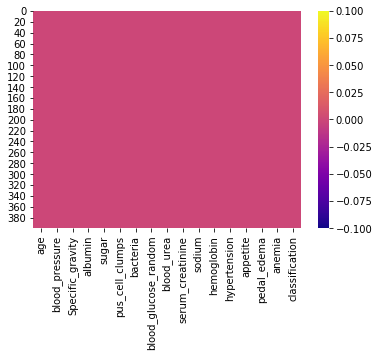

In [17]:
sns.heatmap(s.isnull(),cmap='plasma')

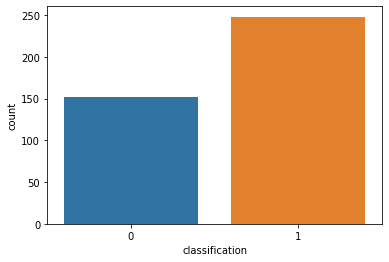

In [18]:
sns.countplot(x='classification',data=s)

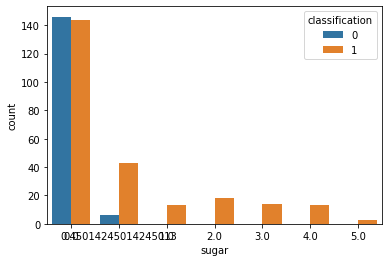

In [19]:
sns.countplot(x='sugar',hue="classification",data=s)

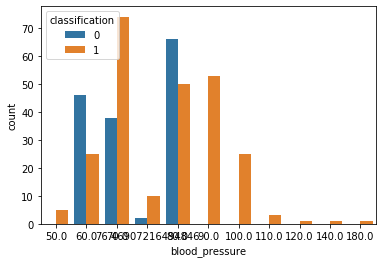

In [20]:
sns.countplot(x='blood_pressure',hue="classification",data=s)

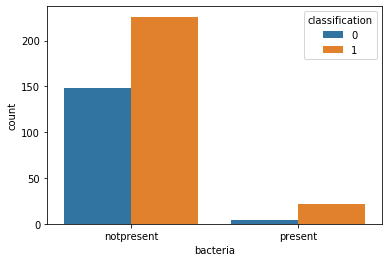

In [21]:
sns.countplot(x='bacteria',hue="classification",data=s)

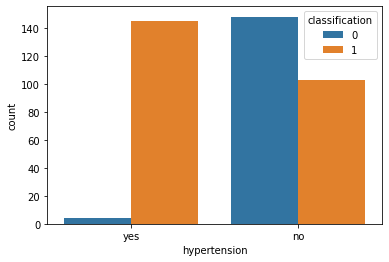

In [22]:
sns.countplot(x='hypertension',hue="classification",data=s)

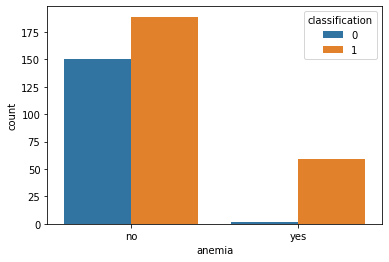

In [23]:
sns.countplot(x='anemia',hue="classification",data=s)

In [26]:
#sns.regplot(x='hypertension',y="classification",data=s)

#convert categorical to numerical

In [27]:
s[['bacteria','pus_cell_clumps']] = s[['bacteria','pus_cell_clumps']].replace(to_replace={'notpresent':0,'present':1})

In [28]:
s[['hypertension',]] = s[['hypertension',]].replace(to_replace={'no':0,'yes':1})

In [29]:
s[['appetite']] = s[['appetite']].replace(to_replace={'poor':0,'good':1,'yes':1})

In [30]:
s[['pedal_edema','anemia']] = s[['pedal_edema','anemia']].replace(to_replace={'no':0,'yes':1})

In [31]:
s['pus_cell_clumps'].value_counts()

0    354
1     46
Name: pus_cell_clumps, dtype: int64

#feature extraction

In [32]:
X=s.drop('classification',axis=1).values
y=s['classification'].values

#train and split the model

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

#feature scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,0:16]=sc.fit_transform(X_train[:,0:16])
X_test[:,0:16]=sc.transform(X_test[:,0:16])

Logistic Regression

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

#applying various callsafication alogrithms and calucalte accuracy,precision and recall

In [37]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [39]:
logistic_regression=accuracy_score(y_test, y_pred)
logistic_regression

0.9477611940298507

#confusion matrix

In [48]:
confusion_matrix(y_test,y_pred)

array([[47,  6],
       [ 1, 80]], dtype=int64)

In [49]:
#accuracy
a_l_r=((47+80)/134)
a

0.9477611940298507

In [54]:
#precision
p_l_r=((47)/48)
p_l_r

0.9791666666666666

In [55]:
#recall
r_l_r=((47)/53)
r_l_r

0.8867924528301887

In [61]:
#f1
f1_l_r=2*((0.88*0.97)/(0.88+0.97))
f1_l_r

0.9228108108108108

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
tre=DecisionTreeClassifier(criterion='entropy',random_state=0)
tre.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [63]:
y_pred=tre.predict(X_test)

In [64]:
decision_tree=accuracy_score(y_test, y_pred)
decision_tree

0.9626865671641791

In [65]:
confusion_matrix(y_pred,y_test)

array([[49,  1],
       [ 4, 80]], dtype=int64)

In [66]:
#accuracy
a_d_t=((49+80)/134)
a_d_t

0.9626865671641791

In [67]:
#precision
p_d_t=((49)/53)
p_d_t

0.9245283018867925

In [68]:
#recall
r_d_t=(49/50)
r_d_t

0.98

In [69]:
#f1_score
f1_d_t=2*((0.98*0.92)/(0.98+0.92))
f1_d_t

0.9490526315789475

RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [74]:
y_pred=rf.predict(X_test)
random_forest=accuracy_score(y_test,y_pred)
random_forest

0.9552238805970149

In [72]:
confusion_matrix(y_test,y_pred)

array([[48,  5],
       [ 1, 80]], dtype=int64)

In [75]:
#accuracy
a_r_f=((48+80)/134)
a_r_f

0.9552238805970149

In [76]:
#precision
p_r_f=(48/49)
p_r_f

0.9795918367346939

In [77]:
#recall
r_r_f=(48/53)
r_r_f

0.9056603773584906

In [78]:
#f1_score
f1_r_f=2*((0.90*0.97)/(0.90+0.97))
f1_r_f

0.9336898395721924

Support Vector Machine

In [79]:
from sklearn.svm import SVC
c=SVC( kernel='linear', random_state=1)
c.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [80]:
y_pred=c.predict(X_test)
s_v_m=accuracy_score(y_test,y_pred)
s_v_m

0.9328358208955224

In [81]:
confusion_matrix(y_test,y_pred)

array([[45,  8],
       [ 1, 80]], dtype=int64)

In [82]:
#accuracy
a_s_m=((45+80)/134)
a_s_m

0.9328358208955224

In [83]:
#precision
p_s_m=(45/46)
p_s_m

0.9782608695652174

In [84]:
#recall
r_s_m=(45/53)
r_s_m

0.8490566037735849

In [85]:
#f1_score
f1_s_m=2*((0.84*0.97)/(0.84+0.97))
f1_s_m

0.9003314917127071

KNN Neighbor

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [87]:
y_pred=classifier.predict(X_test)
k_n_n=accuracy_score(y_test,y_pred)
k_n_n

0.9477611940298507

In [88]:
confusion_matrix(y_test,y_pred)

array([[50,  3],
       [ 4, 77]], dtype=int64)

In [89]:
#accuracy
a_k_n=((50+77)/134)
a_k_n

0.9477611940298507

In [90]:
#precision
p_k_n=((50)/54)
p_k_n

0.9259259259259259

In [91]:
#recall
r_k_n=((50)/53)
r_k_n

0.9433962264150944

In [92]:
#f1_score
f1_r_k_n=2*((0.94*0.92)/(0.94+0.92))
f1_r_k_n

0.9298924731182796

Comaparasion

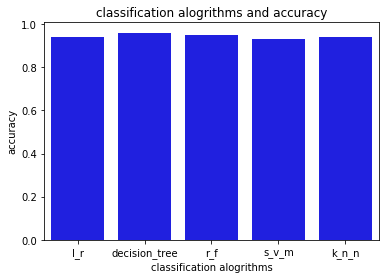

In [95]:
#accuracy
y=[0.94,0.96,0.95,0.93,0.94]
x = ['l_r','decision_tree','r_f','s_v_m','k_n_n']
sns.barplot(x,y,color="b",alpha=1.0)
plt.ylabel("accuracy")
plt.xlabel("classification alogrithms")
plt.title("classification alogrithms and accuracy")
plt.show()

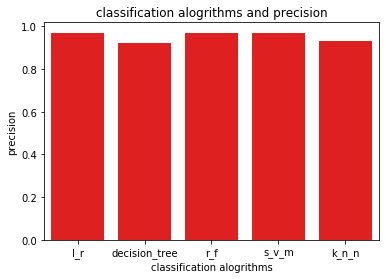

In [98]:
#precision
y=[0.97,0.92,0.97,0.97,0.93]
x = ['l_r','decision_tree','r_f','s_v_m','k_n_n']
sns.barplot(x,y,color="r",alpha=1.0)
plt.ylabel("precision")
plt.xlabel("classification alogrithms")
plt.title("classification alogrithms and precision")
plt.show()

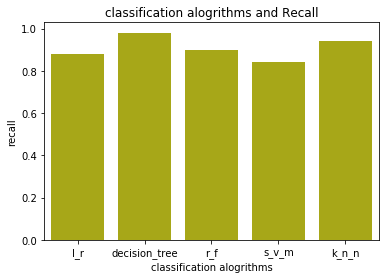

In [100]:
#recall
y=[0.88,0.98,0.90,0.84,0.94]
x = ['l_r','decision_tree','r_f','s_v_m','k_n_n']
sns.barplot(x,y,color="y",alpha=1.0)
plt.ylabel("recall")
plt.xlabel("classification alogrithms")
plt.title("classification alogrithms and Recall")
plt.show()

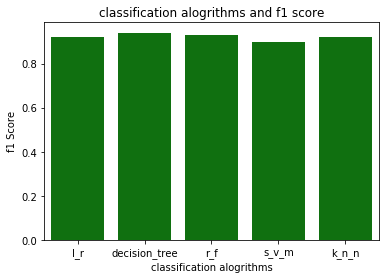

In [102]:
y=[0.92,0.94,0.93,0.90,0.92]
x = ['l_r','decision_tree','r_f','s_v_m','k_n_n']
sns.barplot(x,y,color="g",alpha=1.0)
plt.ylabel("f1 Score")
plt.xlabel("classification alogrithms")
plt.title("classification alogrithms and f1 score")
plt.show()

In [52]:
from sklearn.metrics import average_precision_score
l_r_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      l_r_precision))

Average precision-recall score: 0.93


In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [125]:
logistic_regression=accuracy_score(y_test, y_pred)
logistic_regression

0.9477611940298507

In [58]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.94


In [127]:
from sklearn.tree import DecisionTreeClassifier
tre=DecisionTreeClassifier(criterion='entropy',random_state=0)
tre.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [128]:
y_pred=tre.predict(X_test)

In [131]:
from sklearn.metrics import average_precision_score
d_t_precision= average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      d_t_precision))

Average precision-recall score: 0.95


In [107]:
decision_tree=accuracy_score(y_test, y_pred)
decision_tree

0.9626865671641791

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [133]:
y_pred=rf.predict(X_test)

In [134]:
random_forest=accuracy_score(y_test,y_pred)
random_forest

0.9552238805970149

In [144]:
from sklearn.metrics import average_precision_score
r_f_precision = average_precision_score(y_test, y_pred)

print('Average precision score: {0:0.2f}'.format(
      r_f_precision))

Average precision score: 0.94


In [136]:
from sklearn.svm import SVC
c=SVC( kernel='linear', random_state=1)
c.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [137]:
y_pred=c.predict(X_test)

In [138]:
s_v_m=accuracy_score(y_test,y_pred)
s_v_m

0.9328358208955224

In [139]:
from sklearn.metrics import average_precision_score
s_v_m_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      s_v_m_precision))

Average precision-recall score: 0.91


In [140]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [141]:
y_pred=classifier.predict(X_test)

In [142]:
k_n_n=accuracy_score(y_test,y_pred)
k_n_n

0.9477611940298507

In [143]:
from sklearn.metrics import average_precision_score
k_n_n_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      k_n_n_precision))

Average precision-recall score: 0.94


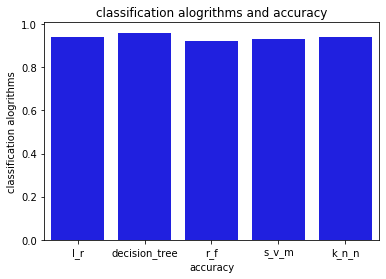

In [120]:
y=[0.94,0.96,0.92,0.93,0.94]
x = ['l_r','decision_tree','r_f','s_v_m','k_n_n']
sns.barplot(x,y,color="b",alpha=1.0)
plt.xlabel("accuracy")
plt.ylabel("classification alogrithms")
plt.title("classification alogrithms and accuracy")
plt.show()

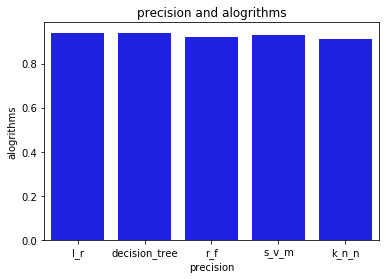

In [148]:
x = ['l_r','decision_tree','r_f','s_v_m','k_n_n']
y=  [0.94,0.94,0.92,0.93,0.91]
sns.barplot(x,y,color="blue")
plt.title("precision and alogrithms")
plt.xlabel("precision")
plt.ylabel("alogrithms")
plt.show()